## Data Prep

In [3]:
import numpy as np 
import pandas as pd
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from datetime import timezone
import datetime
import urllib.request
import gzip
import ast
from tqdm import tqdm
tqdm.pandas()

In [5]:
file_nm = "IO-2022-3733_91706.csv"
file_nm1 = "adbanner.csv"

In [6]:
df_data = pd.read_csv(file_nm, low_memory=False)
df_banner = pd.read_csv(file_nm1, low_memory=False)

In [7]:
df_banner.head(4)

id  type  deleted  creative_id  adcampaign_id  folder_id        image  \
0  52169     0        0          NaN              0      12884   728x90.jpg   
1  52172     0        0          NaN              0      12884  800x250.jpg   
2  52175     0        0          NaN              0      12884  160x600.jpg   
3  52178     0        0          NaN              0      12884  300x250.jpg   

                                                link     size  pixel_area  \
0  https://business-iq.net/assets/9119-innovation...   728x90       65520   
1  https://business-iq.net/assets/9119-innovation...  800x250      200000   
2  https://business-iq.net/assets/9119-innovation...  160x600       96000   
3  https://business-iq.net/assets/9119-innovation...  300x250       75000   

                                       adserving_src  html_adcode  \
0  https://scads-prod.s3.amazonaws.com/uploads/sc...          NaN   
1  https://scads-prod.s3.amazonaws.com/uploads/sc...          NaN   
2  https://scads-prod.s3.amazonaws.com/uploads/sc...          NaN   
3  https://scads-prod.s3.amazonaws.com/uploads/sc...          NaN   

   facebook_title  facebook_body  facebook_creative_id  file_id         name  \
0             NaN            NaN                   NaN    26063   728x90.jpg   
1             NaN            NaN                   NaN    26066  800x250.jpg   
2             NaN            NaN                   NaN    26069  160x600.jpg   
3             NaN            NaN                   NaN    26072  300x250.jpg   

   fpid  fb_type  fb_title  fb_description  fb_body  fb_page  tracking_url  \
0   NaN      NaN       NaN             NaN      NaN      NaN           NaN   
1   NaN      NaN       NaN             NaN      NaN      NaN           NaN   
2   NaN      NaN       NaN             NaN      NaN      NaN           NaN   
3   NaN      NaN       NaN             NaN      NaN      NaN           NaN   

   zip_file_id  new_zip  add_imp_pixel  fallback_url  imp_count  fallback_id  \
0          NaN        0            NaN           NaN          0          NaN   
1          NaN        0            NaN           NaN          0          NaN   
2          NaN        0            NaN           NaN          0          NaN   
3          NaN        0            NaN           NaN          0          NaN   

   ttd_title  ttd_description  add_imp_pixel_2  campaign_id  ttd_sponsor  \
0        NaN              NaN              NaN          NaN          NaN   
1        NaN              NaN              NaN          NaN          NaN   
2        NaN              NaN              NaN          NaN          NaN   
3        NaN              NaN              NaN          NaN          NaN   

                       adform_banner_id banner_source  html_adcode_original  \
0  02f207ed-e1f7-4adc-88ab-258ebbbc923c        manual                   NaN   
1  1676695b-f36e-40e0-b55c-ac4cdcb4f34d        manual                   NaN   
2  54ba3657-6aab-41ba-be8e-527463f77f0d        manual                   NaN   
3  25d748d0-8c64-41e9-97f1-acb707b34c20        manual                   NaN   

   ttd_call_to_action  video_type  video_playback_type  video_is_skippable  \
0                 NaN         NaN                  NaN                 NaN   
1                 NaN         NaN                  NaN                 NaN   
2                 NaN         NaN                  NaN                 NaN   
3                 NaN         NaN                  NaN                 NaN   

   tracking_banner  banner_file  aep_id  
0                0          NaN     NaN  
1                0          NaN     NaN  
2                0          NaN     NaN  
3                0          NaN     NaN

In [8]:
df_data.head(4)

report_date  company_list_id  company_id  campaign_id  banner_id  \
0  2022-10-25             9245    78180926        91706          0   
1  2022-10-25             9245    78180944        91706          0   
2  2022-10-25             9245    78180956        91706          0   
3  2022-10-25             9245    78180959        91706          0   

   company_list_name              company_name company_country  \
0  7801 3733_usa.csv  Mount Airy Casino Resort              US   
1  7801 3733_usa.csv                     Oneok              US   
2  7801 3733_usa.csv      Mercy Medical Center              US   
3  7801 3733_usa.csv             Callaway Golf              US   

   company_ref_id      campaign_name  impressions  impressions_original  \
0             NaN  IO-2022-3733-7801            0                     0   
1             NaN  IO-2022-3733-7801            0                     0   
2             NaN  IO-2022-3733-7801            0                     0   
3             NaN  IO-2022-3733-7801            0                     0   

   clicks  clicks_original  filtered_clicks  interaction  interaction_rate  
0       0                0                0            0               0.0  
1       0                0                0            0               0.0  
2       0                0                0            0               0.0  
3       0                0                0            0               0.0

In [9]:
df_banner1 = df_banner[['id', 'pixel_area', 'folder_id']]

In [10]:
df_data = pd.merge(df_data, df_banner1, how='left', left_on='banner_id', right_on='id')

In [11]:
from datetime import datetime

df_data['report_date'] = pd.to_datetime(df_data['report_date'])
df_data['weekday'] = df_data['report_date'].dt.dayofweek
df_data = df_data[df_data['weekday'] < 5]

In [12]:
cond1 = df_data['impressions'] >= 1
cond2 = df_data['clicks'] >= 1
cond3 = df_data['interaction'] >= 1

df_data1 = df_data[cond1 | cond2 | cond3].groupby(by=['company_name', 'report_date'], as_index=False)['impressions'].count()

In [28]:
df_data1.head(4)

company_name report_date  impressions
0                 1 Hotels  2022-10-17            1
1                 1 Hotels  2022-10-19            1
2  1-800-FLOWERS.COM, INC.  2022-10-20            4
3  1-800-FLOWERS.COM, INC.  2022-11-09            1

In [13]:
df_data2 = df_data1.groupby(by=['company_name'], as_index=False)['impressions'].count()
df_data2.columns = ['company_name', 'days']

In [29]:
df_data2.head(4)

company_name  days
0                 1 Hotels     2
1  1-800-FLOWERS.COM, INC.     2
2             10x Genomics     1
3          1st Source Bank     2

In [14]:
cond4 = df_data['banner_id'] > 0

df_data3 = df_data[cond1 | cond2 | cond3| cond4].groupby(by=['company_name', 'banner_id', 'pixel_area'], as_index=False)['impressions'].count()
df_data3 = df_data3.groupby(by=['company_name'], as_index=False)['pixel_area'].sum()
df_data3['pixel_area'] = df_data3['pixel_area'] / 1000

In [30]:
df_data3.head(4)

company_name  pixel_area
0                 1 Hotels      150.00
1  1-800-FLOWERS.COM, INC.      365.52
2             10x Genomics       75.00
3          1st Source Bank       75.00

In [21]:
df_data11 = df_data.groupby(by=['report_date', 'company_name'], as_index=False).agg({'impressions': 'sum', 'clicks': 'sum', 'interaction': 'sum'})
df_data11 = df_data11.sort_values(by=['company_name', 'report_date'], ascending=True)
df_data11['ttl'] = df_data11.iloc[:,2:5].sum(axis=1)
df_data11['ttl'] = [False if x == 0 else True for x in df_data11['ttl']]
df_data11.reset_index(inplace=True, drop=True)

In [23]:
df_data11.head(4)

report_date company_name  impressions  clicks  interaction    ttl
0  2022-10-13     1 Hotels            0       0            0  False
1  2022-10-14     1 Hotels            0       0            0  False
2  2022-10-17     1 Hotels            1       0            0   True
3  2022-10-18     1 Hotels            0       0            0  False

In [24]:
from itertools import groupby

# Return a list of the length of each consecutive trend
def groups(list):
    return [sum(g) for i, g in groupby(list) if i==1]

In [25]:
consecutive_days = []
companies = []

for company in tqdm(df_data11['company_name'].unique()):
    if sum(df_data11[df_data11['company_name']==company]['ttl'])==0:
        consecutive_days.append(0)
        companies.append(company)
    else:
        consecutive_days.append(max(groups(df_data11[df_data11['company_name']==company]['ttl'])))
        companies.append(company)

100%|█████████████████████████████████████████████████████████████████████████████| 15537/15537 [04:18<00:00, 60.07it/s]


In [31]:
df_data4 = pd.DataFrame(list(zip(companies, consecutive_days)), columns=['company_name', 'days_cons'])

In [32]:
df_data4.head(4)

company_name  days_cons
0                 1 Hotels          1
1           1-800 CONTACTS          0
2  1-800-FLOWERS.COM, INC.          1
3                 10Pearls          0

In [33]:
df_data['pxl_imp'] = df_data['pixel_area'] * df_data['impressions'] / 1000

In [35]:
test_data = df_data.groupby(by=['company_name'], as_index=False).agg({'impressions': 'sum', 'clicks': 'sum', 'interaction': 'sum', 'folder_id': 'nunique', 'pxl_imp': 'sum'})

In [36]:
test_data['ttl']=test_data.iloc[:,1:4].sum(axis=1)

In [37]:
cond5 = test_data['ttl'] > 0
test_data = test_data[cond5]
test_data.reset_index(drop=True, inplace=True)

In [38]:
test_data = test_data.merge(df_data2, how='left', on='company_name')
test_data = test_data.merge(df_data3, how='left', on='company_name')
test_data = test_data.merge(df_data4, how='left', on='company_name')

In [39]:
test_data.head(4)

company_name  impressions  clicks  interaction  folder_id  \
0                 1 Hotels            4       0            0          2   
1  1-800-FLOWERS.COM, INC.            6       0            0          4   
2             10x Genomics            1       0            0          1   
3          1st Source Bank            2       0            0          1   

   pxl_imp  ttl  days  pixel_area  days_cons  
0   300.00    4     2      150.00          1  
1   440.52    6     2      365.52          1  
2    75.00    1     1       75.00          1  
3   150.00    2     2       75.00          1

## Correlation

In [40]:
test_data_corr = test_data.drop(['ttl'],axis=1)

In [42]:
test_data_corr.head(4)

company_name  impressions  clicks  interaction  folder_id  \
0                 1 Hotels            4       0            0          2   
1  1-800-FLOWERS.COM, INC.            6       0            0          4   
2             10x Genomics            1       0            0          1   
3          1st Source Bank            2       0            0          1   

   pxl_imp  days  pixel_area  days_cons  
0   300.00     2      150.00          1  
1   440.52     2      365.52          1  
2    75.00     1       75.00          1  
3   150.00     2       75.00          1

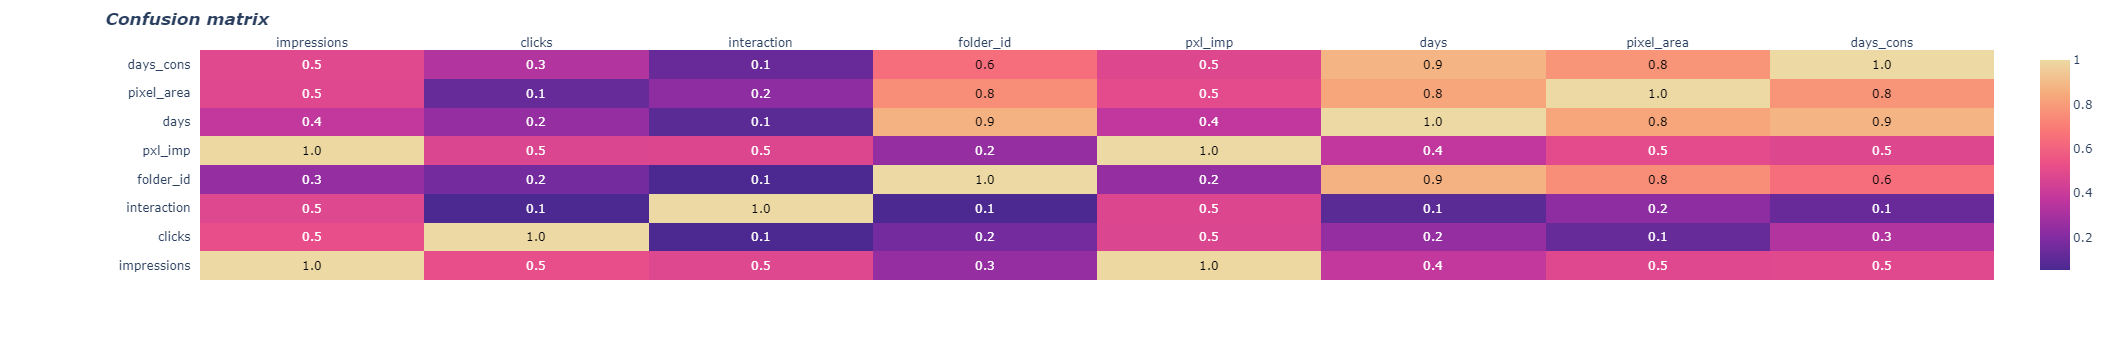

In [45]:
import plotly.express as px
import plotly.figure_factory as ff
import pandas as pd

dfc = test_data_corr.corr()
z = dfc.values.tolist()

# change each element of z to type string for annotations
# z_text = [[str(y) for y in x] for x in z]
z_text = [[str(round(y, 1)) for y in x] for x in z]

# set up figure 
fig = ff.create_annotated_heatmap(z=dfc.to_numpy(), 
                                     x=dfc.columns.tolist(),
                                     y=dfc.index.tolist(),
                                     annotation_text=z_text, colorscale='agsunset')

# add title
fig.update_layout(title_text='<i><b>Confusion matrix</b></i>',
                  #xaxis = dict(title='x'),
                  #yaxis = dict(title='x')
                 )

# add custom xaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="",
                        xref="paper",
                        yref="paper"))

# add custom yaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.35,
                        y=0.5,
                        showarrow=False,
                        text="",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# adjust margins to make room for yaxis title
fig.update_layout(margin=dict(t=50, l=200))

# add colorbar
fig['data'][0]['showscale'] = True
fig.show()

## Initial Visualization

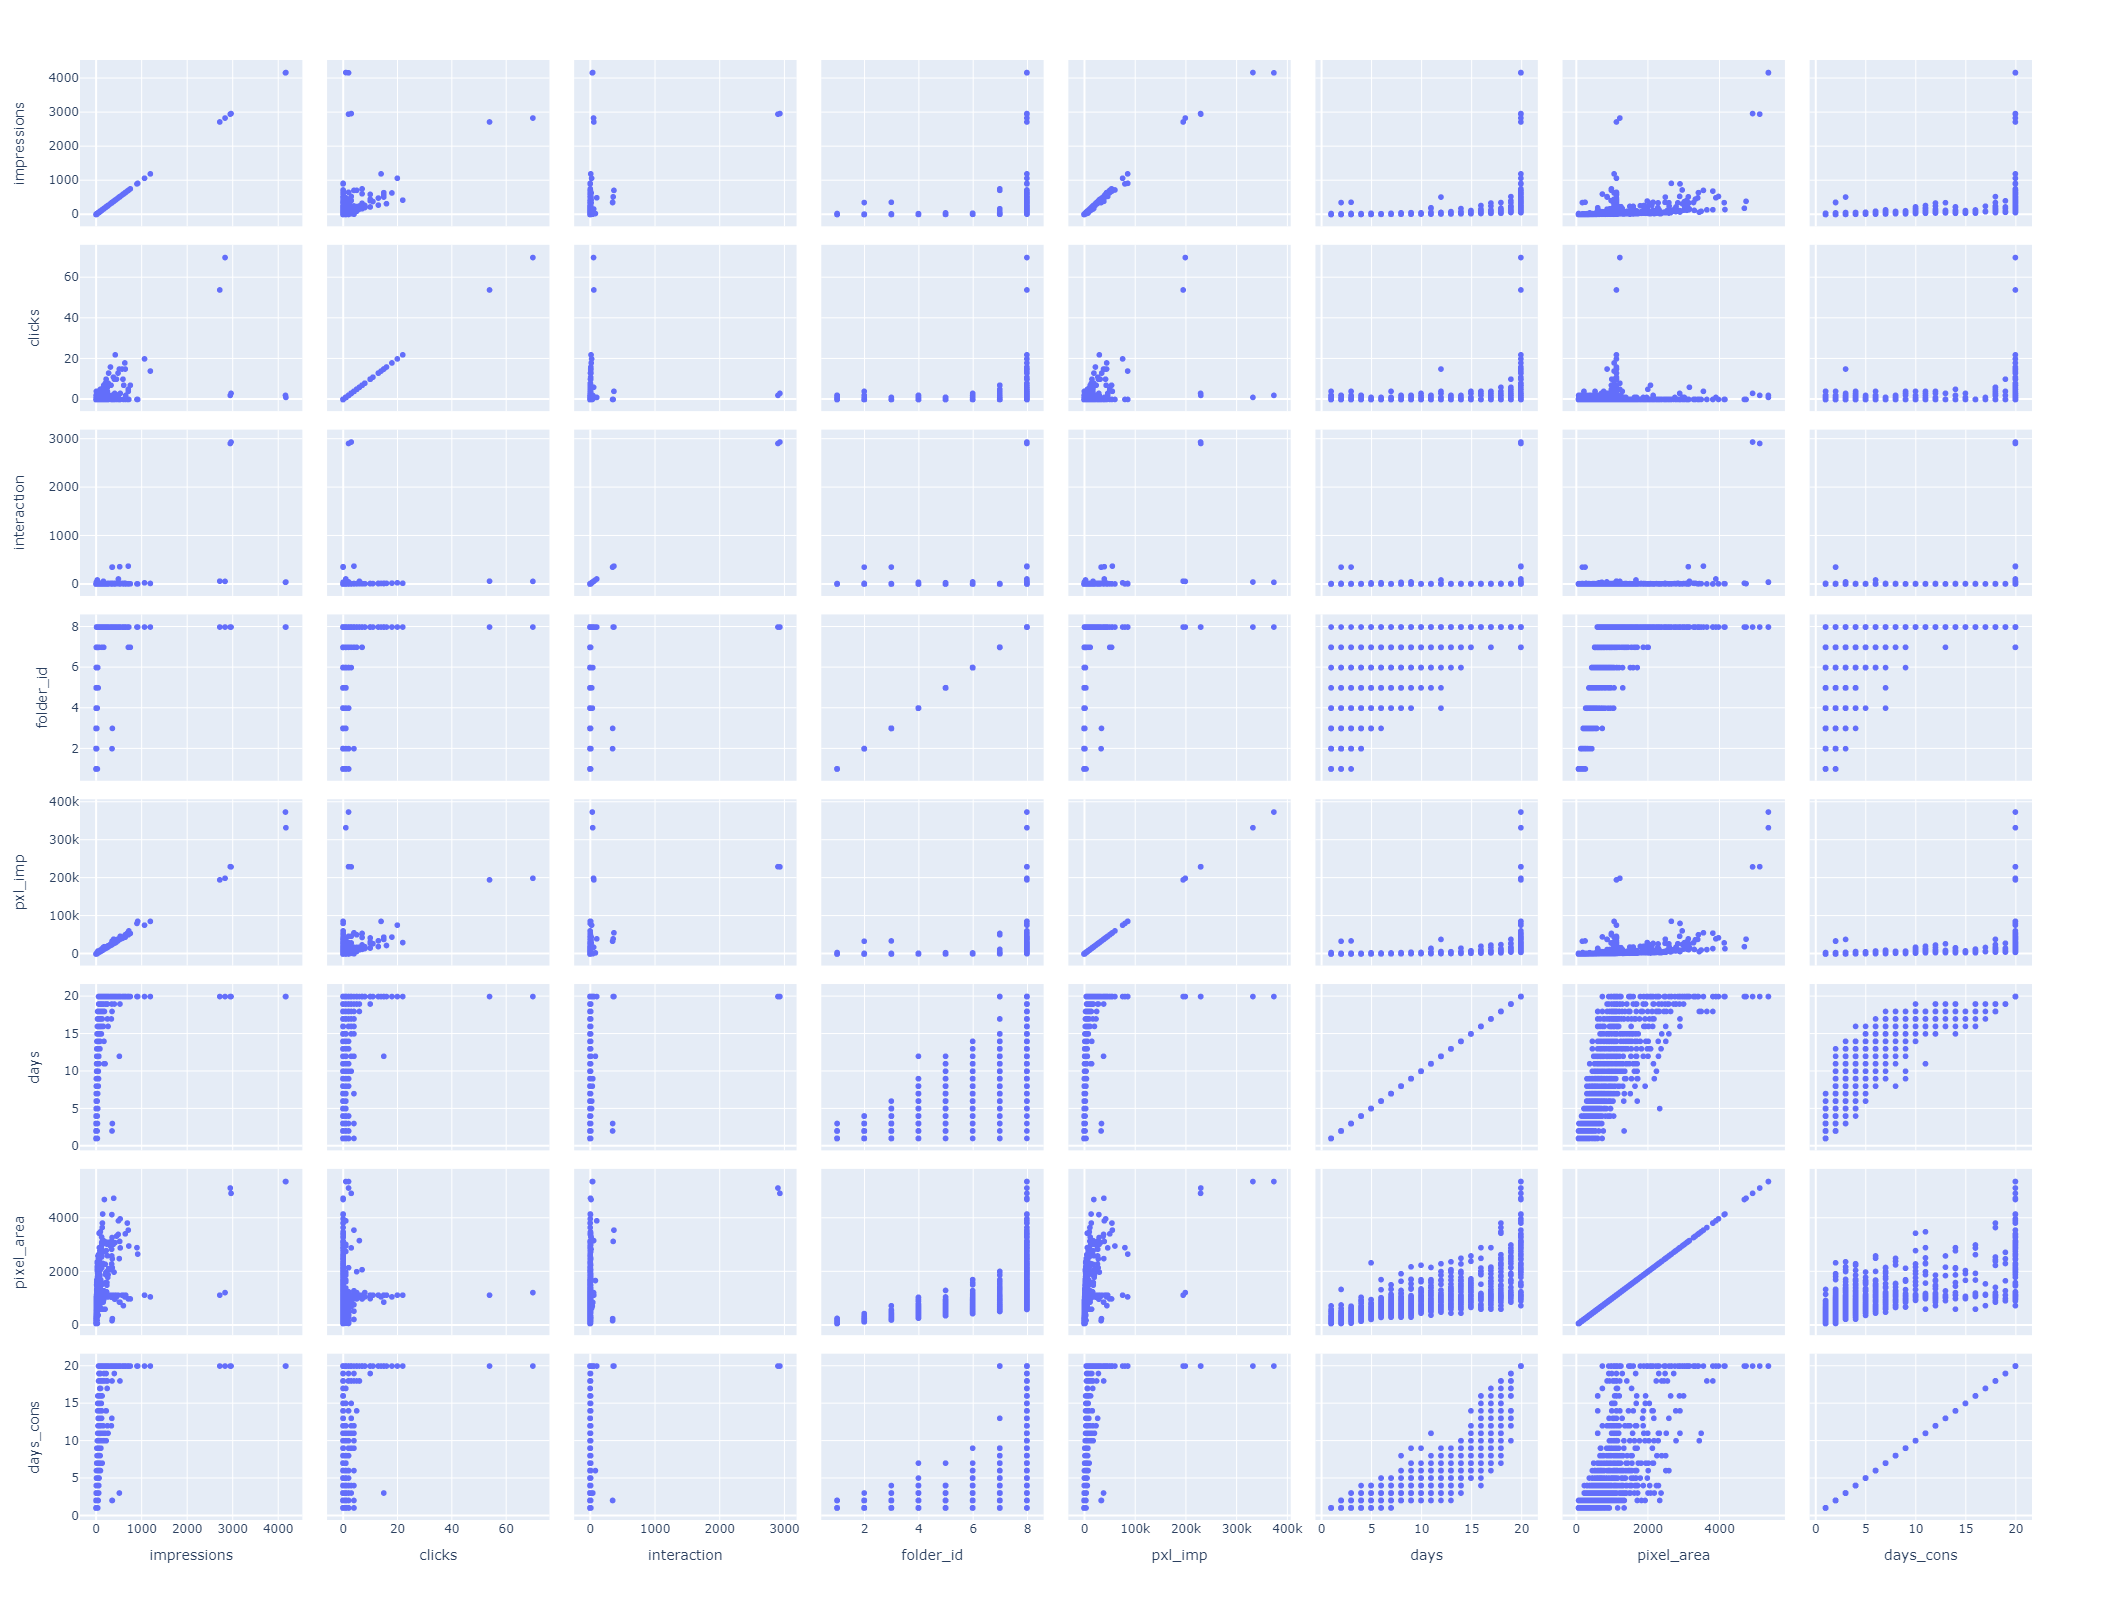

In [46]:
import plotly.express as px

fig = px.scatter_matrix(test_data.drop(["company_name", 'ttl'],axis=1), width=1200, height=1600)
fig.show()

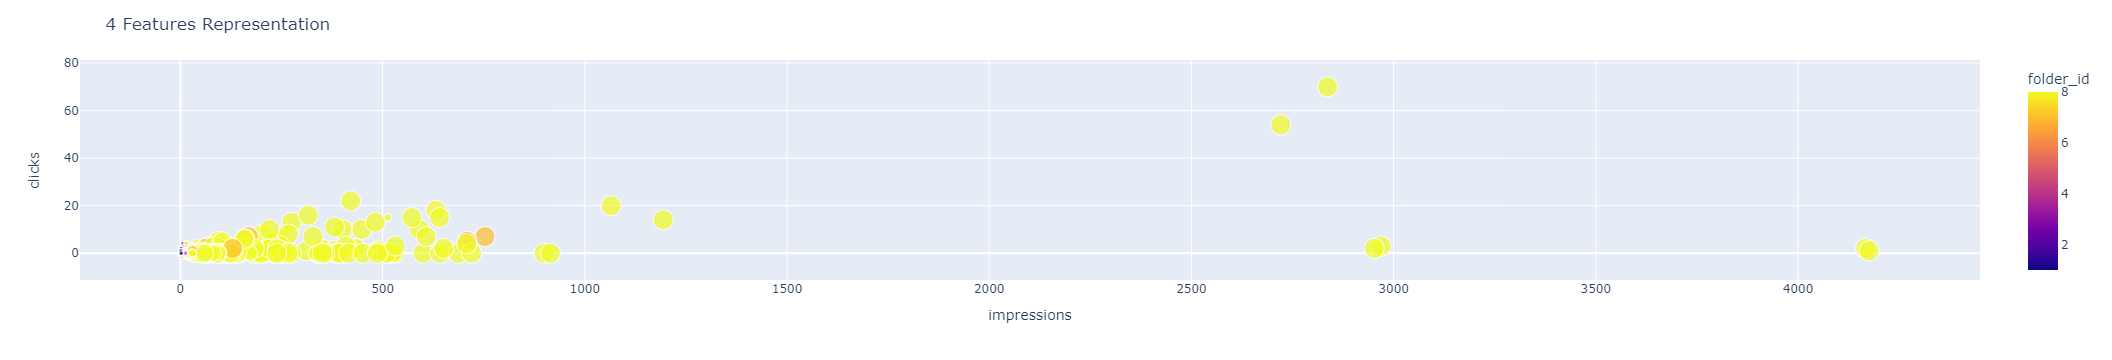

In [47]:
fig1 = px.scatter(test_data, x="impressions", y="clicks", color="folder_id", size='days_cons')
fig1.update_layout(title="4 Features Representation")
fig1.show()

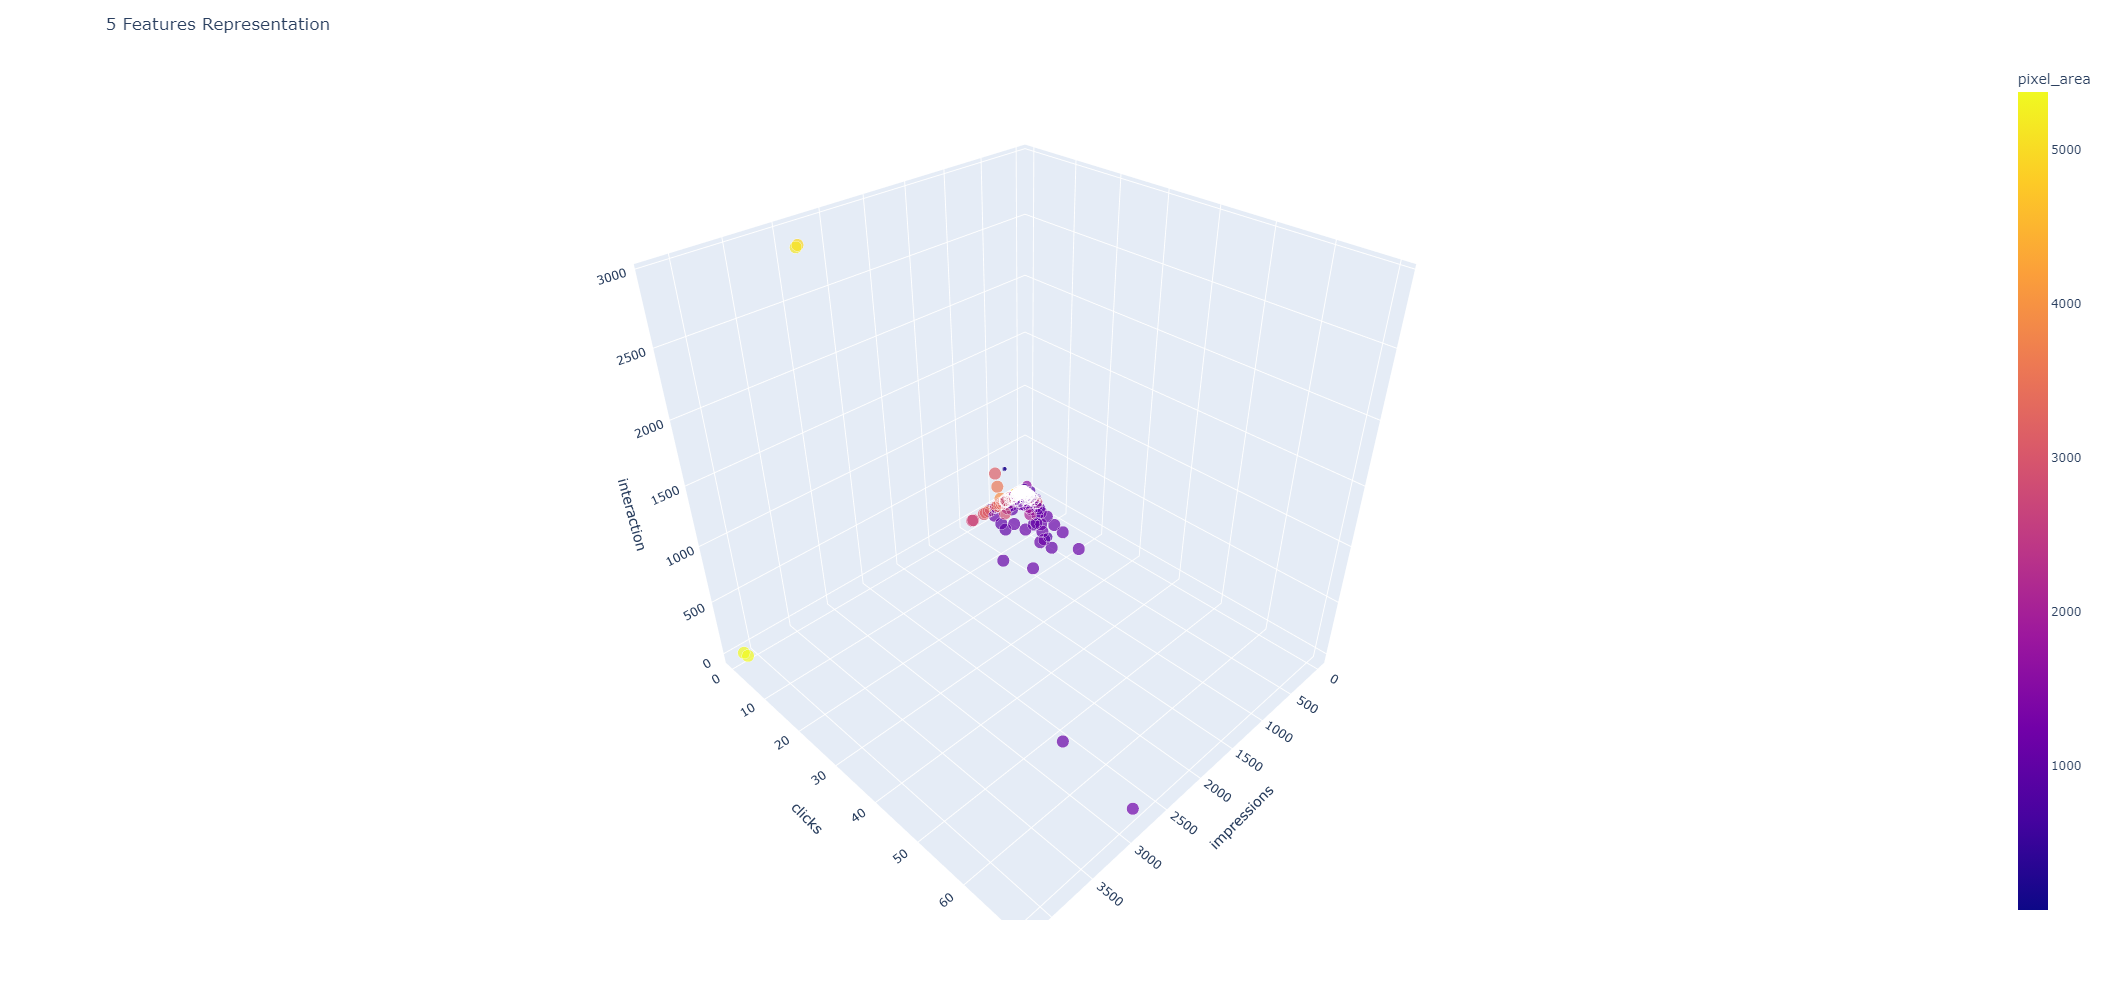

In [48]:
fig2 = px.scatter_3d(test_data, x="impressions", y="clicks", z='interaction', color="pixel_area", size='days', width=1500, height=1000)
fig2.update_layout(title="5 Features Representation")
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig2.show()

## PCA

In [49]:
from pca import pca

In [50]:
model = pca(n_components=5)

In [51]:
df_pca = test_data.drop(['company_name', 'ttl'],axis=1)

In [52]:
df_pca

impressions  clicks  interaction  folder_id  pxl_imp  days  pixel_area  \
0               4       0            0          2   300.00     2      150.00   
1               6       0            0          4   440.52     2      365.52   
2               1       0            0          1    75.00     1       75.00   
3               2       0            0          1   150.00     2       75.00   
4               3       0            0          3   225.00     3      225.00   
...           ...     ...          ...        ...      ...   ...         ...   
2821           60       0            0          8  4284.72    18     1203.60   
2822            1       0            0          1    75.00     1       75.00   
2823            1       1            1          1    75.00     1       75.00   
2824            2       0            0          1   150.00     1       75.00   
2825           30       0            0          8  2231.04    12      731.04   

      days_cons  
0             1  
1             1  
2             1  
3             1  
4             1  
...         ...  
2821         16  
2822          1  
2823          1  
2824          1  
2825          3  

[2826 rows x 8 columns]

In [53]:
out = model.fit_transform(df_pca)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [54]:
out

{'loadings':      impressions    clicks  interaction  folder_id   pxl_imp      days  \
 PC1     0.012493  0.000070     0.002708   0.000047  0.999679  0.000147   
 PC2    -0.004968 -0.000496    -0.001323   0.003625 -0.021826  0.007723   
 PC3     0.035123 -0.005511     0.999316  -0.002287 -0.003177 -0.006722   
 PC4    -0.988917 -0.084825     0.033228  -0.032094  0.012377 -0.083873   
 PC5     0.116464 -0.003008    -0.013529  -0.249822 -0.001432 -0.761779   
 
      pixel_area  days_cons  
 PC1    0.021889   0.000151  
 PC2    0.999699   0.005130  
 PC3    0.001518  -0.006315  
 PC4   -0.003496  -0.074249  
 PC5    0.010326  -0.586018  ,
 'PC':               PC1         PC2       PC3        PC4        PC5
 0    -2183.094926 -292.138607  2.161940   1.727619   0.682057
 1    -2037.877455  -79.753174  2.108329   0.671193   2.439580
 2    -2409.701981 -362.201628  2.666559   2.287850   0.892081
 3    -2334.713442 -363.835819  2.456685   2.143300   0.139337
 4    -2256.441439 -215.507929  2.

In [61]:
out['outliers'][out['outliers']['y_bool'] == True].head(4)

y_proba    y_score  y_bool  y_bool_spe   y_score_spe
57   2.106911e-02  21.003509    True       False  25814.703941
88   3.235335e-02  19.687262    True        True  24583.762196
120  1.080421e-07  52.128198    True        True  42509.344013
131  1.362056e-06  46.123763    True        True  39848.041894

In [57]:
print(out['topfeat'])

    PC      feature   loading  type
0  PC1      pxl_imp  0.999679  best
1  PC2   pixel_area  0.999699  best
2  PC3  interaction  0.999316  best
3  PC4  impressions -0.988917  best
4  PC5         days -0.761779  best
5  PC4       clicks -0.084825  weak
6  PC5    folder_id -0.249822  weak
7  PC5    days_cons -0.586018  weak


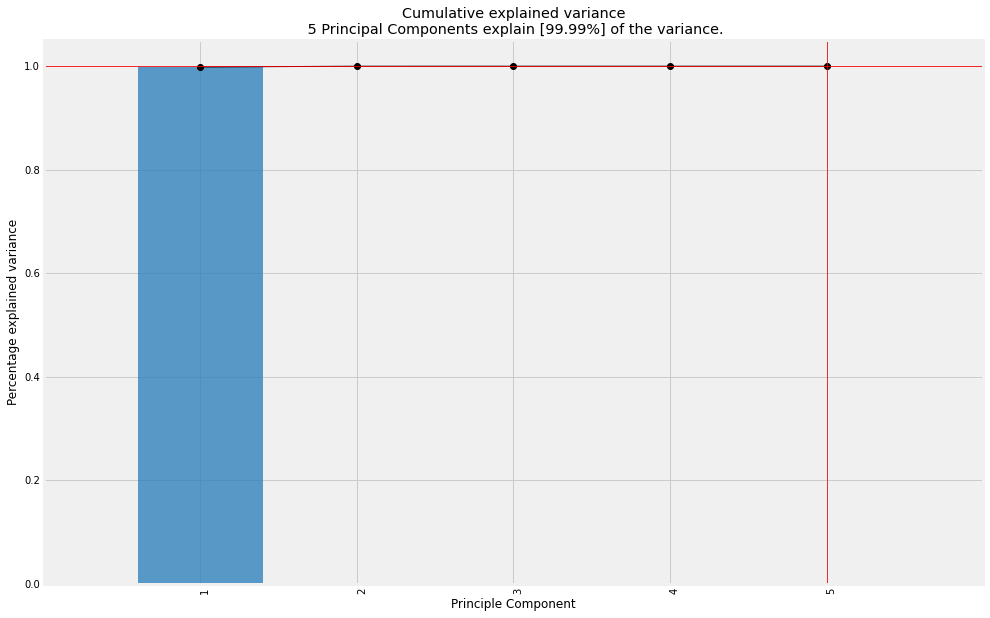

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 5 Principal Components explain [99.99%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [58]:
model.plot()

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [2826] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [2826] unique colors! Available unique colors: [9].


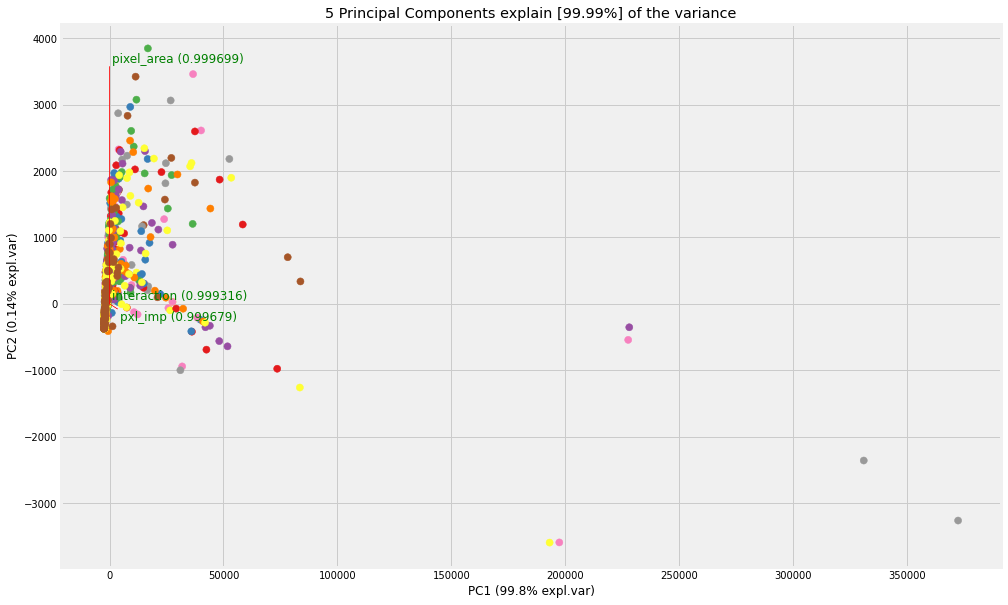

In [59]:
ax = model.biplot(n_feat=3, legend=False, label=None)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [2826] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [2826] unique colors! Available unique colors: [9].


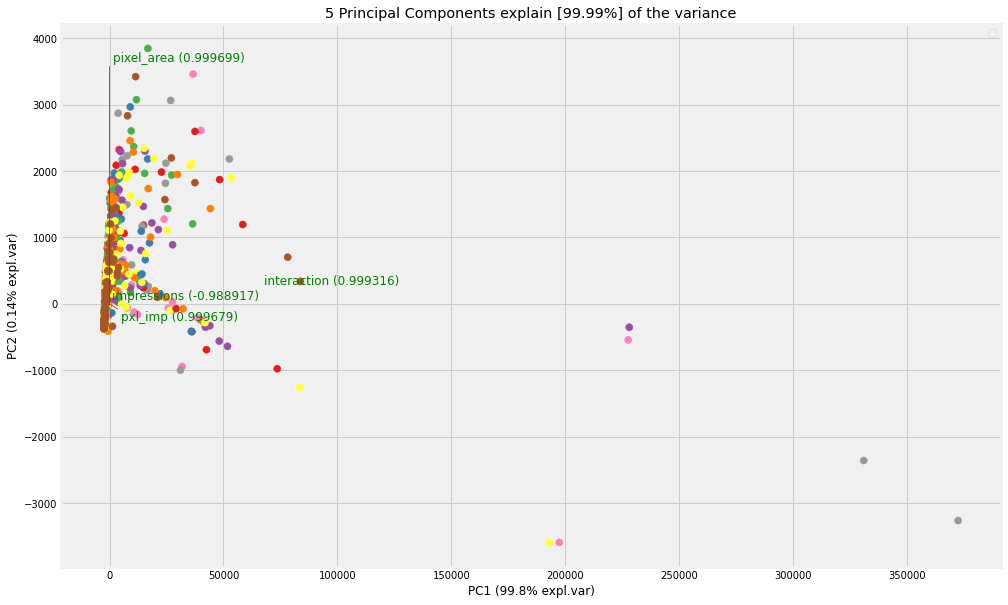

In [60]:
fig, ax = model.biplot(n_feat=4, PC=[0,1], label=None)

## Initail Testing

In [62]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import numpy as np

X = test_data.drop(["company_name", 'ttl'],axis=1)

In [63]:
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

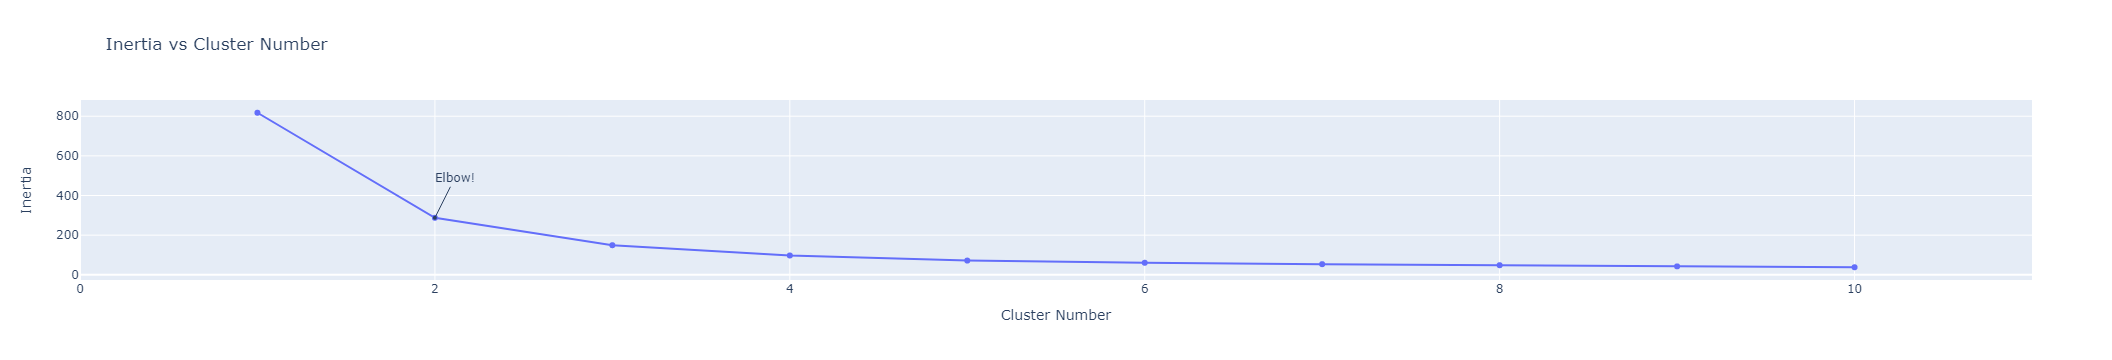

In [64]:
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 annotations=[
        dict(
            x=2,
            y=inertia[1],
            xref="x",
            yref="y",
            text="Elbow!",
            showarrow=True,
            arrowhead=6,
            ax=20,
            ay=-40
        )
    ])

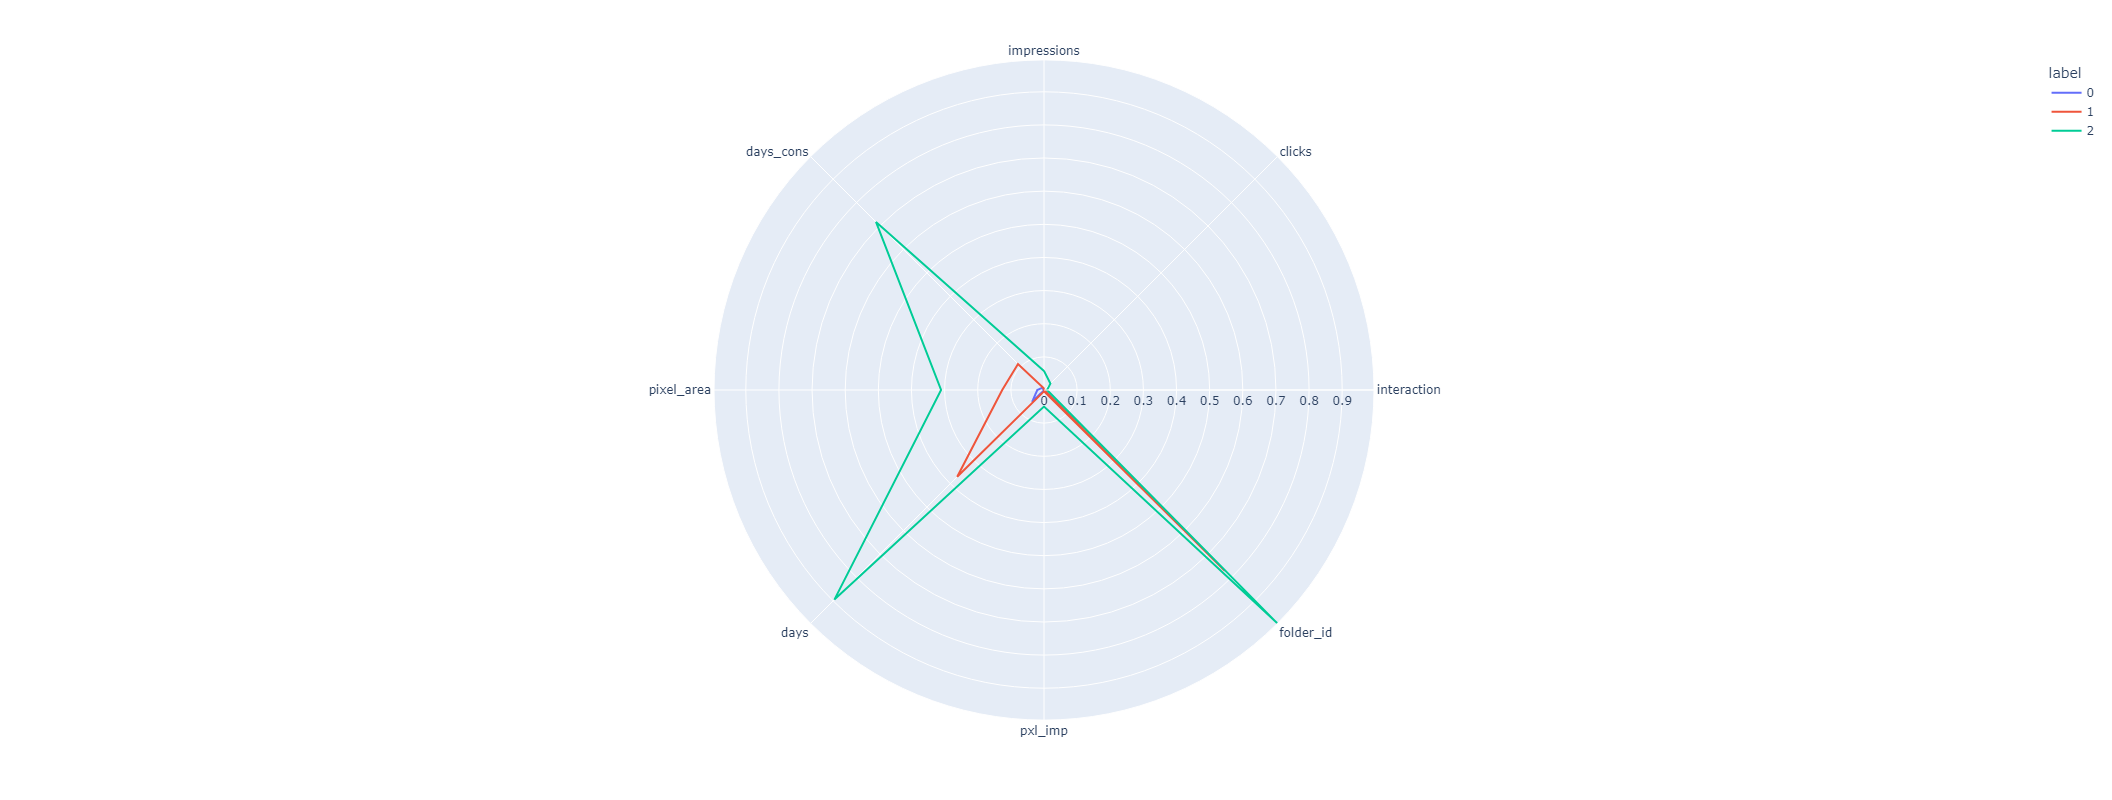

In [67]:
kmeans = KMeans(
        n_clusters=3, init="k-means++",
        n_init=100,
        tol=1e-04, random_state=42
    )
kmeans.fit(X)
clusters=pd.DataFrame(X,columns=test_data.drop(["company_name", 'ttl'],axis=1).columns)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
fig4.show()

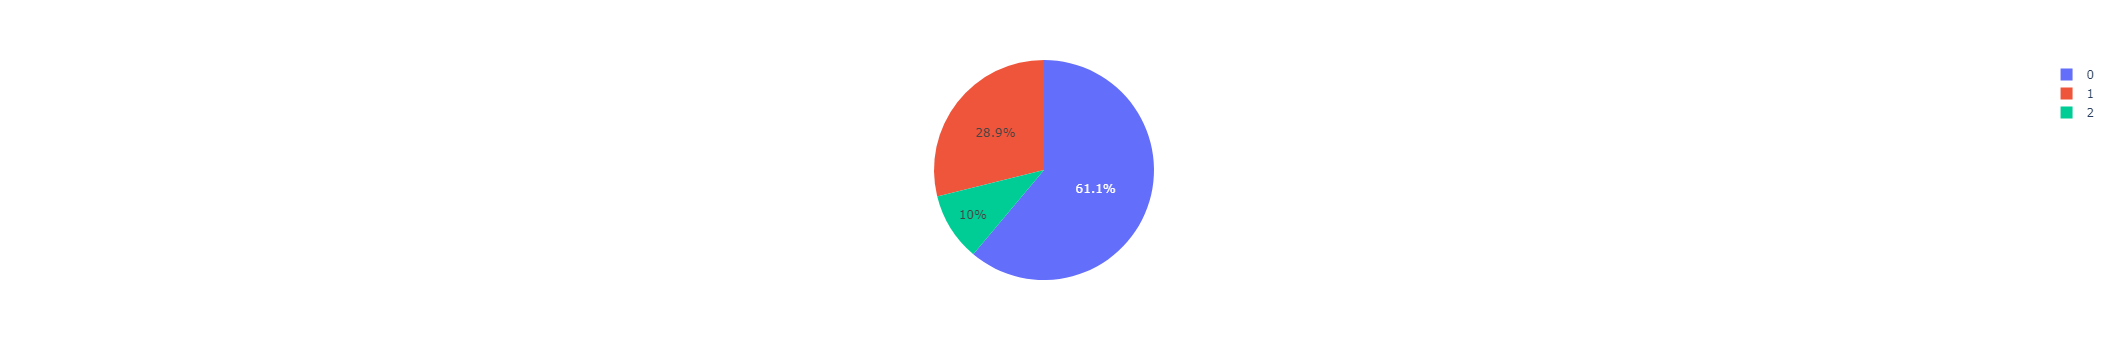

In [66]:
pie=clusters.groupby('label').size().reset_index()
pie.columns=['label','value']
px.pie(pie,values='value',names='label',color=['blue','red','green'])

In [68]:
results1 = test_data.drop(['ttl'],axis=1)

In [72]:
results1['label'] = kmeans.labels_
results1['label'] = results1['label'].replace([0, 1, 2], ['Low', 'Medium', 'High'])

### Visualisation Test1

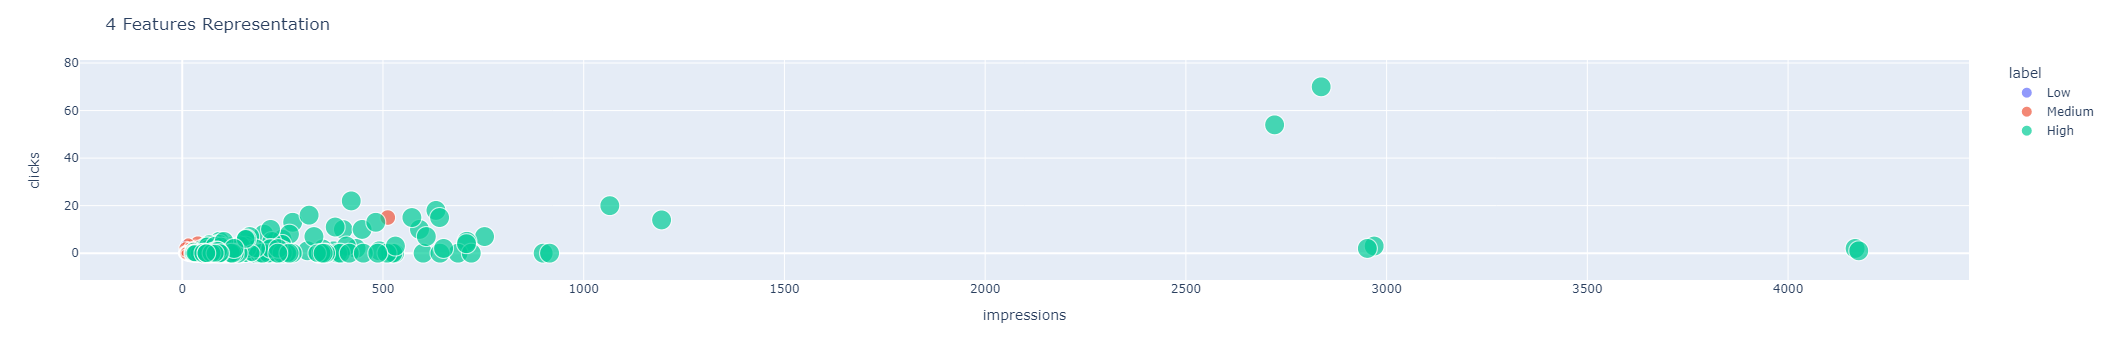

In [ ]:
fig6 = px.scatter(results1, x="impressions", y="clicks", color="label", size='days')
fig6.update_layout(title="4 Features Representation")
fig6.show()

In [ ]:
fig7 = px.scatter_3d(results1, x="days", y="folder_id", z='clicks', color="label", size='days', width=1800, height=1100)
fig7.update_layout(title="5 Features Representation")
fig7.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig7.show()